In [1]:
from tgp.gp_predictor import GPPredictor
from tgp.rbf_kernel import RBFKernel
from tgp.matern_kernels import MaternKernel32
from tgp.brownian_kernel import BrownianKernel
from tgp.summed_kernel import SummedKernel
import numpy as np

In [80]:
#[3.         6.34083005]
#[0.01       0.41548044 0.42870145]
#-114479.07920201524
#38751.245863436925

kernel = SummedKernel([
    #BrownianKernel(0.2858),
    MaternKernel32(np.array([3.]), 0.41548),
    MaternKernel32(np.array([6.3408]), 0.42870)
])

In [3]:
# Get some data
from tdata.datasets.oncourt_dataset import OnCourtDataset

In [4]:
dataset = OnCourtDataset()

/anaconda2/envs/py3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda2/envs/py3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [5]:
df = dataset.get_stats_df()

In [81]:
recent = df[df['year'] >= 2017]

In [82]:
winners = recent['winner'].values
losers = recent['loser'].values
days_since_start = (recent['start_date'] - 
                    recent['start_date'].min()).dt.days.values

In [83]:
predictor = GPPredictor(kernel)
predictor.fit(winners, losers, days_since_start)

-38160.18349521801


In [84]:
# Look at some players
fhat = predictor.f_hat

In [85]:
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import timedelta

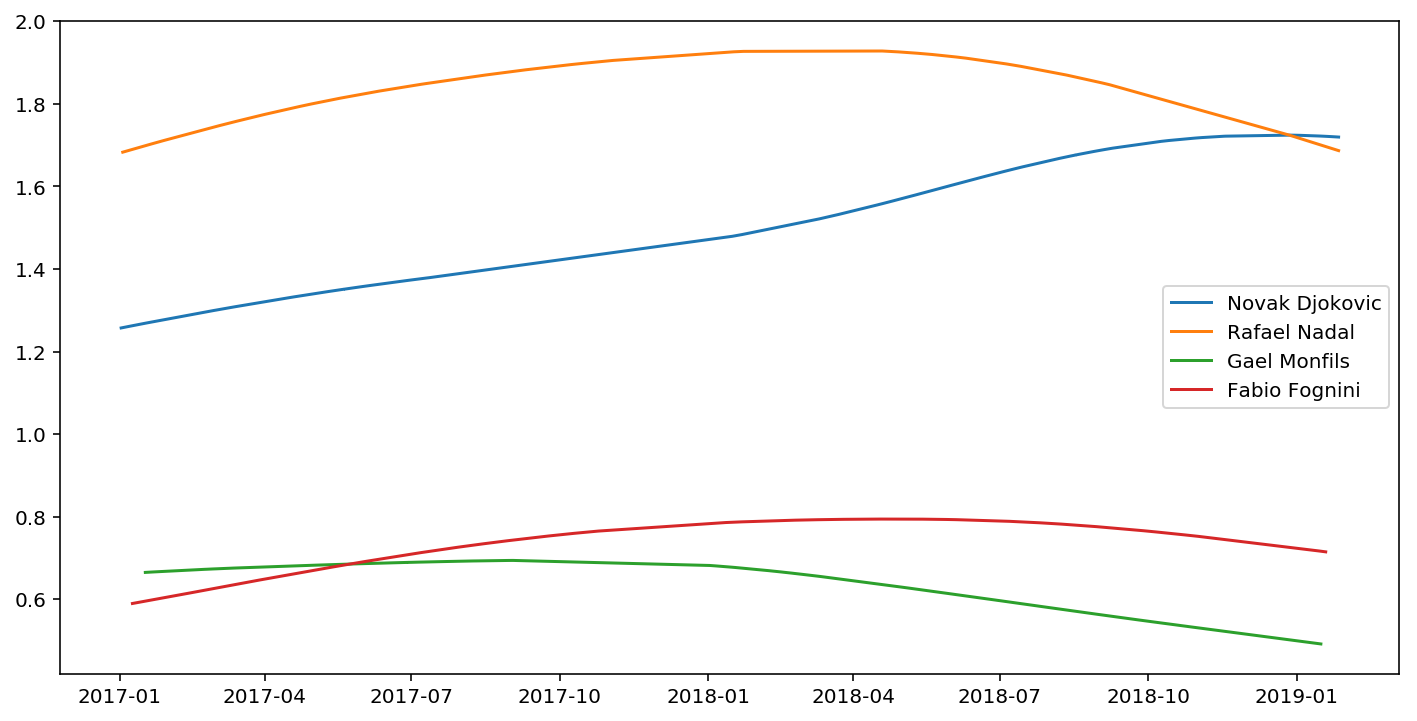

In [86]:
# Find the player of interest
players = ['Novak Djokovic', 'Rafael Nadal', 'Gael Monfils', 'Fabio Fognini']

for p in players:

    p_id = predictor.encoder.transform([p])[0]

    p_s = predictor.s[p_id]
    p_e = predictor.e[p_id]

    fs = fhat[p_s:p_e]
    x = predictor.X[p_s:p_e] * predictor.sd_x + predictor.mean_x

    dates = [recent['start_date'].min() + timedelta(days=cur_x)
             for cur_x in x.reshape(-1)]

    plt.plot(dates, fs, label=p)

plt.legend()
plt.gcf().set_size_inches(12, 6)

In [87]:
# Find final ratings for everyone
final_ratings = {cur_player: fhat[cur_x - 1] for cur_x, cur_player, cur_start in zip(predictor.e, predictor.encoder.classes_, predictor.s)}

In [88]:
import pandas as pd

pd.Series(final_ratings).sort_values(ascending=False)

Novak Djokovic           1.719548
Rafael Nadal             1.686690
Roger Federer            1.424938
Juan Martin Del Potro    1.380977
Kei Nishikori            1.234468
Kevin Anderson           1.182333
Alexander Zverev         1.110245
Karen Khachanov          1.015402
Stefanos Tsitsipas       1.012929
Roberto Bautista Agut    1.003738
Marin Cilic              0.994770
Daniil Medvedev          0.985075
Borna Coric              0.940228
Milos Raonic             0.779756
Dominic Thiem            0.778333
Tomas Berdych            0.730018
Alex De Minaur           0.723218
David Goffin             0.719029
Fabio Fognini            0.714638
Richard Gasquet          0.654836
Grigor Dimitrov          0.652162
Martin Klizan            0.639349
Kyle Edmund              0.620760
John Isner               0.614290
Nikoloz Basilashvili     0.603380
Stan Wawrinka            0.581021
Frances Tiafoe           0.554578
Gilles Simon             0.547597
Nick Kyrgios             0.546297
Pablo Carreno-